In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
#Load the data set 
Titanic_Data_path = "../Data/titanic_data.csv"
Titanic_Data = pd.read_csv(Titanic_Data_path)
Titanic_Data_copy = pd.read_csv(Titanic_Data_path)
Titanic_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Counting the missing values in every column
Missing_Values = Titanic_Data.isnull().sum()
Missing_Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Calculating the percentage of null values
Total_Cells = np.product(Titanic_Data.shape)
Total_Missing_Cells = Missing_Values.sum()

(Total_Missing_Cells/Total_Cells) * 100

8.099513655069211

In [6]:
Titanic_Data["Sex"]=Titanic_Data["Sex"].replace(['female','male'],[0,1]) #replacing strings by numeric values to make sense
Titanic_Data["Age"].fillna(Titanic_Data.Age.median(),inplace=True) #replacing null values with the median
Titanic_Data["Embarked"].fillna(Titanic_Data.Embarked.mode()[0],inplace=True) #replacing null values with the mode
Titanic_Data.drop(['Cabin','Name','PassengerId','Ticket'],axis=1,inplace=True) #drop columns that we don't need

In [7]:
#showing the impact of each char on the label column
Titanic_Data[["Embarked","Survived"]].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending =False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [8]:
#replacing strings with numeric values to make sense
Titanic_Data["Embarked"] = Titanic_Data["Embarked"].replace(['C','Q','S'],[0,1,2])
Titanic_Data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [9]:
#showing the correlation
Titanic_Data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


In [10]:
#making test and training data sets
Y = Titanic_Data["Survived"]
X = Titanic_Data.drop(["Survived"],axis=1)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(f"Train size {X_train.shape[0]} rows\nTest size {X_test.shape[0]} rows")

Train size 712 rows
Test size 179 rows


In [11]:
print("Shape of Y train: " + str(Y_train.shape))
print("Shape of Y test: " + str(Y_test.shape))

Shape of Y train: (712,)
Shape of Y test: (179,)


In [12]:
Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)

print("Shape of Y train: " + str(Y_train.shape))
print("Shape of Y test: " + str(Y_test.shape))

Shape of Y train: (712, 1)
Shape of Y test: (179, 1)


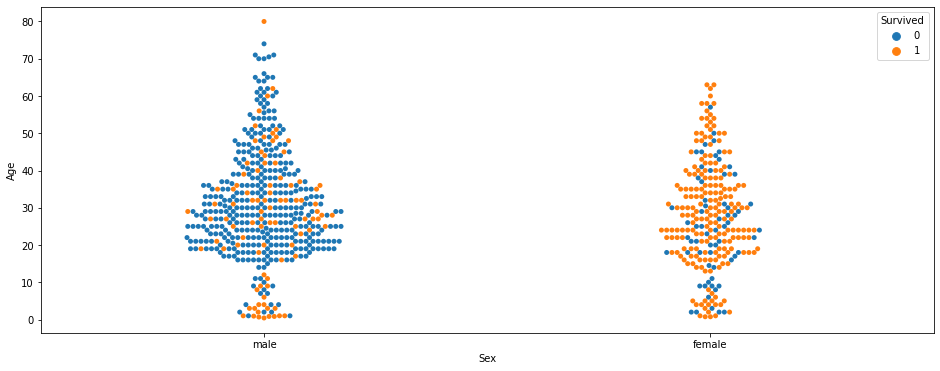

In [13]:
plt.figure(figsize=(16,6))
sns.swarmplot(x=Titanic_Data_copy['Sex'],y=Titanic_Data_copy['Age'],hue=Titanic_Data_copy['Survived'])
plt.show()

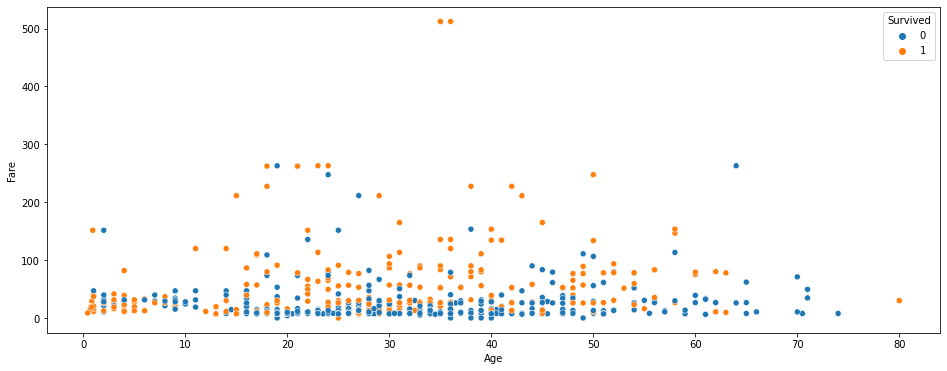

In [14]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=Titanic_Data_copy['Age'],y=Titanic_Data_copy['Fare'],hue=Titanic_Data_copy['Survived'])
plt.show()

In [15]:
def intialize_parameters(dim):
    W = np.zeros(shape = (dim,1))
    b = 0
   
    assert(W.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return W,b

In [16]:
W,b = intialize_parameters(7)
print("Initialization of parameter W : " + str(W))
print("Initialization of parameter b : " + str(b))



Initialization of parameter W : [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Initialization of parameter b : 0


In [17]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

In [18]:
def propagate(X,W,b,Y):
    m = X.shape[0]
    Z = np.dot(X,W) +b  
    A = sigmoid(Z)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) 

    dW = (1/m) * np.dot(X.T,(A-Y))
    db = (1/m) * np.sum((A-Y)) 

    grads = {"dW":dW
    ,"db" :db}
    assert(dW.shape == W.shape)
    assert(db.dtype == float)
    assert(Z.dtype == float)
    assert(cost.shape == ())
   
    return cost , grads

In [19]:
def optimization(X,W,b,Y,iterations = 2000,learning_rate=0.01,print_cost = False):
    costs = []

    for i in range(iterations):
        cost,grads = propagate(X,W,b,Y)

        dW = grads["dW"]
        db = grads["db"]

        W = W - learning_rate * dW
        b = b - learning_rate * db 
        if i % 100 == 0:
                costs.append(cost)
                
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i : %f" %(i,cost))
    parameters = {"W":W,
        "b":b}
    grads = {"dW":dW,
        "db":db}    

        

    return parameters , grads , costs

In [20]:
def predict(W,b,X):

    m = X.shape[0]
    Y_predicted = np.zeros((m,1))
    W = W.reshape(X.shape[1],1)

    Z = np.dot(X,W)+b
    A = sigmoid(Z)

    for i in range(A.shape[0]):
        Y_predicted[i,0] = 1 if A[i,0]>0.5 else 0

    assert(Y_predicted.shape == (m,1) ) 

    return Y_predicted   

In [21]:
def model(X_train,Y_train,X_test,Y_test,iterations = 2000,learning_rate = 0.01,print_cost = False):
    W,b = intialize_parameters(X_train.shape[1])
   

    parameters , grads , costs = optimization(X_train,W,b,Y_train,iterations,learning_rate,print_cost)

    W = parameters["W"]
    b = parameters["b"]

    Y_prediction_train = predict(W,b,X_train)
    Y_prediction_test = predict(W,b,X_test)

    print("train accuracy: {} %" .format(100 - np.mean(np.abs(Y_prediction_train-Y_train))*100))
    print("test accuracy: {} %" .format(100 - np.mean(np.abs(Y_prediction_test-Y_test))*100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "b" : b,
         "learning_rate" : learning_rate,
         "iterations": iterations}

    return d

In [22]:
d = model(X_train,Y_train,X_test,Y_test,iterations=20000,learning_rate=0.001,print_cost=True)

Cost after iteration 0 : 0.693147
Cost after iteration 100 : 0.615806
Cost after iteration 200 : 0.612362
Cost after iteration 300 : 0.609246
Cost after iteration 400 : 0.606417
Cost after iteration 500 : 0.603838
Cost after iteration 600 : 0.601478
Cost after iteration 700 : 0.599311
Cost after iteration 800 : 0.597311
Cost after iteration 900 : 0.595458
Cost after iteration 1000 : 0.593734
Cost after iteration 1100 : 0.592122
Cost after iteration 1200 : 0.590610
Cost after iteration 1300 : 0.589184
Cost after iteration 1400 : 0.587836
Cost after iteration 1500 : 0.586554
Cost after iteration 1600 : 0.585333
Cost after iteration 1700 : 0.584164
Cost after iteration 1800 : 0.583043
Cost after iteration 1900 : 0.581964
Cost after iteration 2000 : 0.580922
Cost after iteration 2100 : 0.579914
Cost after iteration 2200 : 0.578936
Cost after iteration 2300 : 0.577986
Cost after iteration 2400 : 0.577060
Cost after iteration 2500 : 0.576157
Cost after iteration 2600 : 0.575275
Cost after it